In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/1521273946.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load the dataset
columns = [
    'Family Name', 
    'Variation',
    'Algorithm Name', 
    'Year',
    'Looked at?',
    'Relevant?',
    'Parallel?',
    'Time Complexity Class',
    'Approximation Factor Class (Mult)', 
    'Approximation Factor Class (Add)',
    'Approximation Type (additive/multiplicative)',	
    'Parametrized Approximation?',
    'Type of PTAS (if PTAS)',
    'Quantum?'
]
approximation_algorithms = pd.read_csv('approximation_algorithms.csv', usecols=columns)

# Clean and prepare the data
# drop Looked at? == 0.001 or 0
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0.001']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0']
# drop Relevant? == 0
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != 0]
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != '0']

# filter out parallel algorithms
approximation_algorithms = approximation_algorithms[approximation_algorithms['Parallel?'] != '1']

approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != '1']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != 1]






approximation_algorithms['Year'] = pd.to_numeric(approximation_algorithms['Year'].str.extract(r'(\d{4})')[0], errors='coerce')
approximation_algorithms.dropna(subset=['Year'], inplace=True)
# approximation_algorithms['Year'] = approximation_algorithms['Year'].astype(int)

# drop empty family names
approximation_algorithms = approximation_algorithms[approximation_algorithms['Family Name'].notnull()]

for col in ['Time Complexity Class', 'Approximation Factor Class (Mult)', 'Approximation Factor Class (Add)']:
    # Extract numeric (float) from string
    approximation_algorithms[col] = approximation_algorithms[col].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)
    approximation_algorithms[col] = approximation_algorithms[col].replace(0, 99999)
    

approximation_algorithms.sort_values(by=['Family Name', 'Variation', 'Year'], inplace=True)

approximation_algorithms


,Family Name,Looked at?,Relevant?,Variation,Algorithm Name,Year,Time Complexity Class,Approximation Factor Class (Mult),Approximation Factor Class (Add),Approximation Type (additive/multiplicative),Parametrized Approximation?,Type of PTAS (if PTAS),Parallel?,Quantum?
153,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Aingworth, Chekuri, Indyk, Motwani",1999.0,5.50,99999.0,2.00,additive,no,NaN,0,0.0
154,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_2]",2000.0,5.33,99999.0,2.00,additive,no,NaN,0,0.0
155,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_k]",2000.0,5.01,99999.0,3.00,additive,yes,NaN,0,0.0
156,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_infty]",2000.0,5.01,4.0,99999.00,multiplicative,no,NaN,0,0.0
157,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Deng, Kirkpatrick, Rong, V. Williams, Zhong",2022.0,5.29,99999.0,2.00,additive,no,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,The Vertex Cover Problem,1,1,"The Vertex Cover Size Problem, Sparse (Approxi...","Biswas, Raman, Saurabh",2020.0,NaN,3.0,99999.00,multiplicative,no,NaN,0,0.0
750,The Vertex Cover Problem,1,1,"The Vertex Cover Size Problem, Sparse (Approxi...",Behnezhad [Theorem 1.3],2021.0,NaN,3.0,5.99,multiplicative-additive,yes,NaN,0,0.0
896,Wiener Index,1,1,Minimum Wiener Connector problem,NaN,2008.0,5.50,2.0,99999.00,multiplicative,yes,FPTAS,0,0.0
895,Wiener Index,1,1,Minimum Wiener Connector problem,Ruchansky,2015.0,5.01,4.0,99999.00,multiplicative,no,NaN,0,0.0


In [3]:
# read sheet1
# Load the dataset
columns = [
    'Family Name', 
    'Variation',
    'Algorithm Name', 
    'Year',
    'Looked at?',
    'Time Complexity Class',
    'Approximate?',
    'Parallel?',
    'Quantum?'
]
sheet1 = pd.read_csv('sheet1.csv', usecols=columns)

# Clean and prepare the data
# drop Looked at? == 0.001
sheet1 = sheet1[sheet1['Looked at?'] != 0.001]
# drop Parallel? == 1
sheet1 = sheet1[sheet1['Parallel?'] != '1']
sheet1 = sheet1[sheet1['Quantum?'] != '1']
sheet1 = sheet1[sheet1['Quantum?'] != 1]
# drop approximate? == 1
sheet1 = sheet1[sheet1['Approximate?'] != '1']


# parse time complexity class
sheet1['Time Complexity Class'] = sheet1['Time Complexity Class'].str.extract(r'(\d+\.?\d*)')[0].astype(float)

# drop if Famiy Name is not in approximation_algorithms
sheet1 = sheet1[sheet1['Family Name'].isin(approximation_algorithms['Family Name'])]

sheet1



,Family Name,Looked at?,Variation,Algorithm Name,Year,Time Complexity Class,Approximate?,Parallel?,Quantum?
2,Optimal Binary Search Trees,2.0,Alphabetic Tree Problem,Klawe; Mumey,1993.0,3.000,0,0,0.0
8,The Subset-Sum Problem,2.0,Subset Sum,Pisinger,2003.0,3.000,0,0,0.0
9,The Subset-Sum Problem,2.0,Subset Sum,Faaland,1973.0,3.000,0,0,0.0
10,The Subset-Sum Problem,2.0,Subset Sum,Pferschy,1999.0,3.000,0,0,0.0
11,The Subset-Sum Problem,2.0,Subset Sum,Klinz,1999.0,4.500,0,0,0.0
...,...,...,...,...,...,...,...,...,...
903,Link Analysis,1.0,Link Analysis,Tomlin,2003.0,6.000,0,0,0.0
904,Link Analysis,1.0,Link Analysis,Achlioptas,2001.0,6.000,0,0,0.0
922,Maximum Cut,2.0,Maximum Cut,Brute Force,1975.0,8.000,0,0,0.0
930,Determinant of Matrices with Integer Entries,2.0,Determinant of Matrices with Integer Entries,Bareiss algorithm,1968.0,5.520,0,0,0.0


In [4]:
def plot_family(family):
    df = pd.concat([approximation_algorithms, sheet1], axis=0)

    df = df[df['Family Name'] == family]

    # create column exact that is True if the algorithm have no Approximation Type
    df['Exact'] = df['Approximation Type (additive/multiplicative)'].isnull()

    # create a column Constant Factor that is True if the algorithm have Approximation Factor Class (Mult) <= 2 or Approximation Factor Class (Add) <= 4.5 or is exact
    df['Constant Factor'] = (df['Approximation Factor Class (Mult)'].astype(float) <= 4.5) | (df['Approximation Factor Class (Add)'].astype(float) <= 2) | df['Exact']
    # sort by year and time complexity
    df.sort_values(by=['Year', 'Time Complexity Class'], inplace=True)


    # plot Time Complexity Class vs Year
    exact = df[df['Exact']]
    constant_factor = df[df['Constant Factor']]
    approximate = df[df['Constant Factor'] == False]

    def fill_best(df, column="Time Complexity Class"):
        best = []
        last_best = 99999
        for index, row in df.iterrows():
            if row[column] < last_best:
                best.append(True)
                last_best = row[column]
            else:
                best.append(False)

        return best

    exact['Best'] = fill_best(exact)
    constant_factor['Best'] = fill_best(constant_factor)
    df['Best'] = fill_best(df)

    plt.figure(figsize=(10, 6))
    plt.scatter(approximate['Year'], approximate['Time Complexity Class'], label='Any reasonable error', color='orange')
    plt.scatter(constant_factor['Year'], constant_factor['Time Complexity Class'], label='Constant-term/factor', color='blue')
    plt.scatter(exact['Year'], exact['Time Complexity Class'], label='Exact', color='green')

    if len(approximate) > 0:
        best_approximate = df[df['Best']]
        last_row = best_approximate.iloc[-1:].copy()
        last_row['Year'] = 2024
        best_approximate = pd.concat([best_approximate, last_row], ignore_index=True)
        plt.step(best_approximate['Year'], best_approximate['Time Complexity Class'], where='post', color='orange')

    if len(constant_factor) > 0:
        best_constant_factor = constant_factor[constant_factor['Best']]
        last_row = best_constant_factor.iloc[-1:].copy()
        last_row['Year'] = 2024
        best_constant_factor = pd.concat([best_constant_factor, last_row], ignore_index=True)
        plt.step(best_constant_factor['Year'], best_constant_factor['Time Complexity Class'], where='post', color='blue')

    if len(exact) > 0:
        best_exact = exact[exact['Best']]
        last_row = best_exact.iloc[-1:].copy()
        last_row['Year'] = 2024
        best_exact = pd.concat([best_exact, last_row], ignore_index=True)
        plt.step(best_exact['Year'], best_exact['Time Complexity Class'], where='post', color='green')


        


    plt.yticks(np.arange(1, 9, 1), ['Constant', 'Polylogarithmic', 'Linear', 'Quasilinear', 'Quadratic', 'Cubic', 'Polynomial (>3)', 'Superpolynomial'])


    plt.xlabel('Year')
    plt.ylabel('Time Complexity Class')
    plt.legend()
    plt.title(family)
    plt.show()



/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


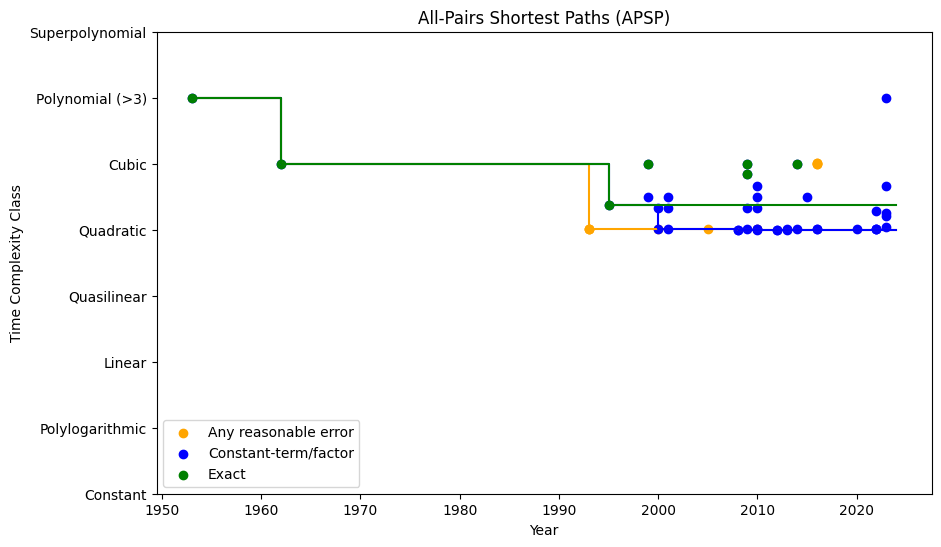

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


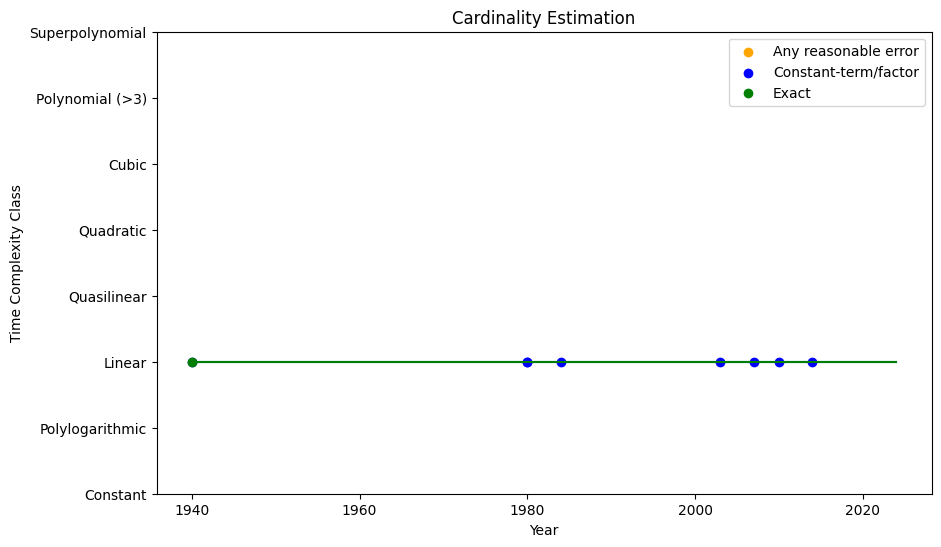

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


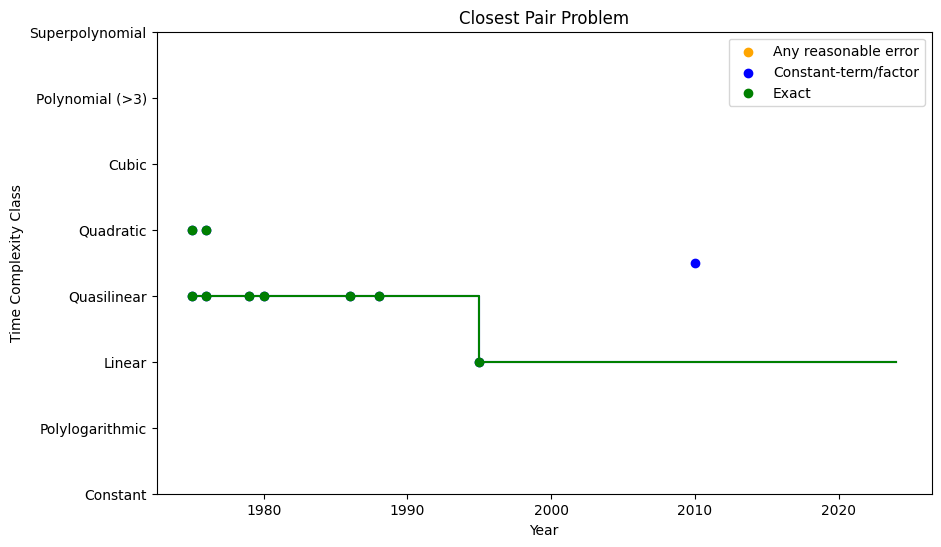

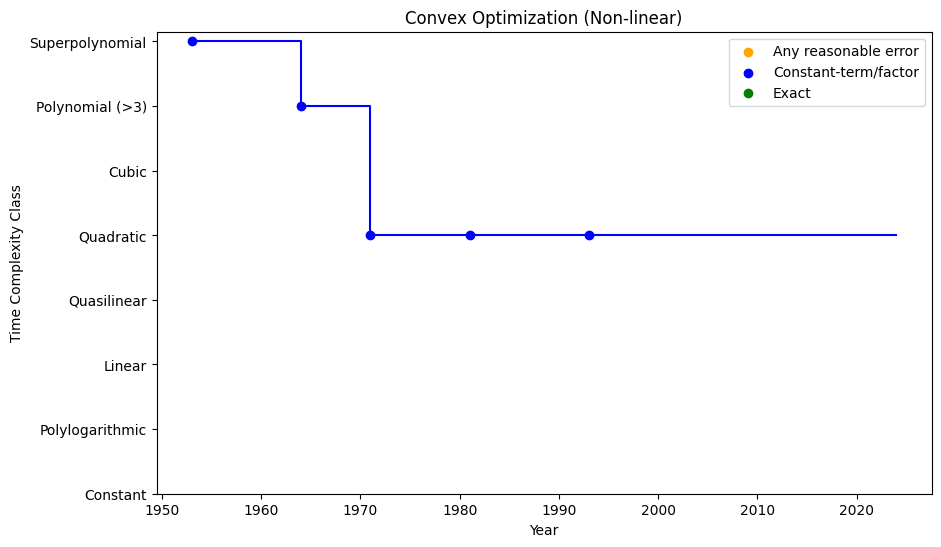

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


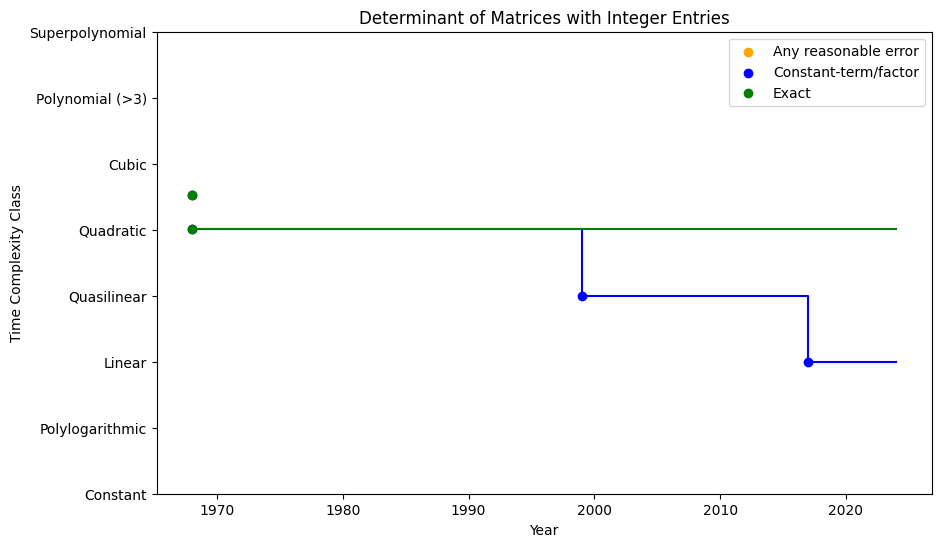

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


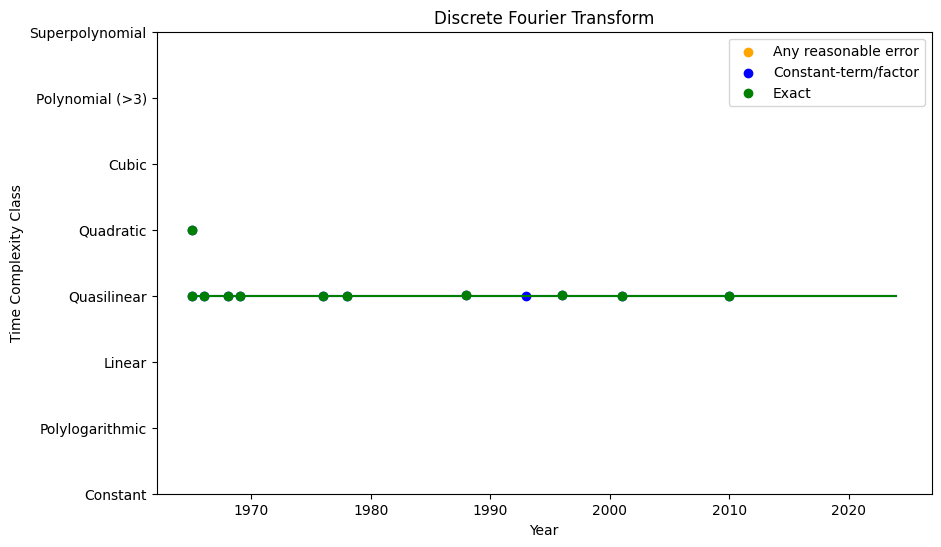

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


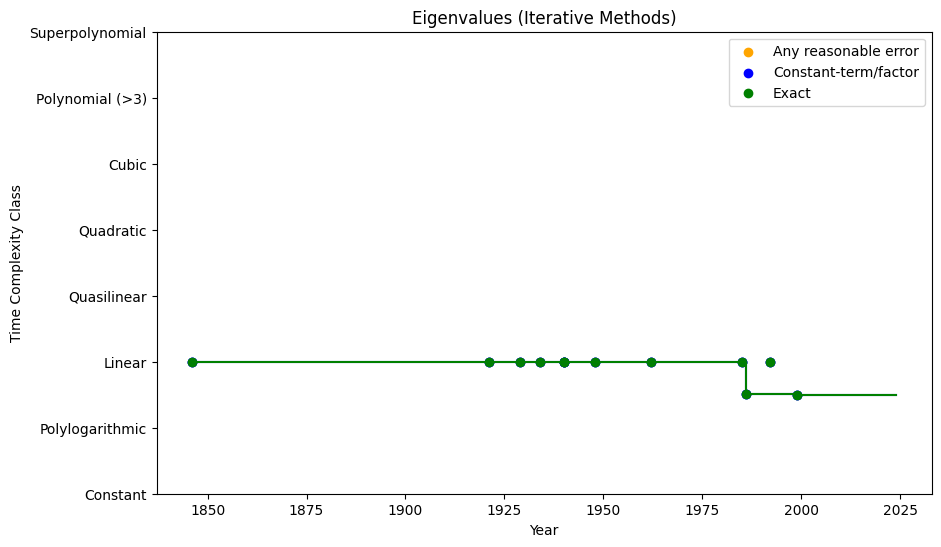

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


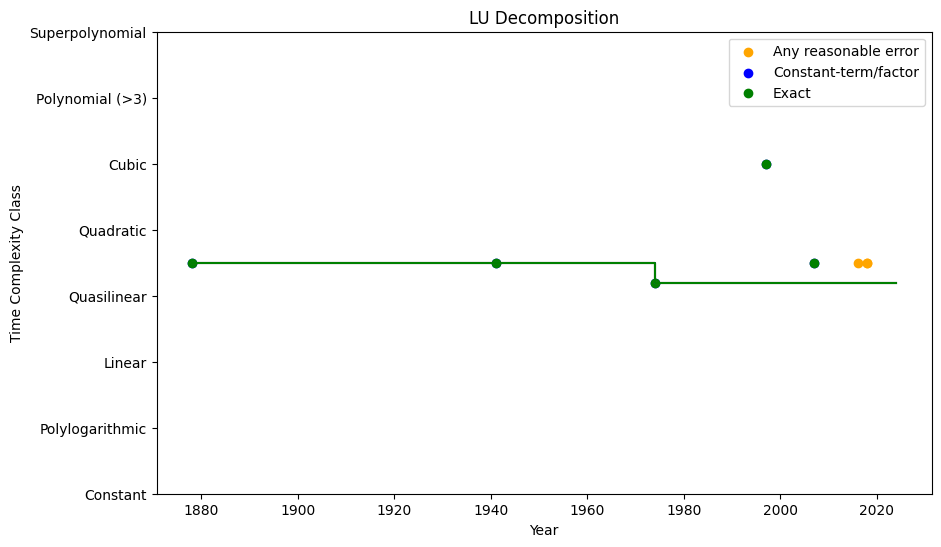

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


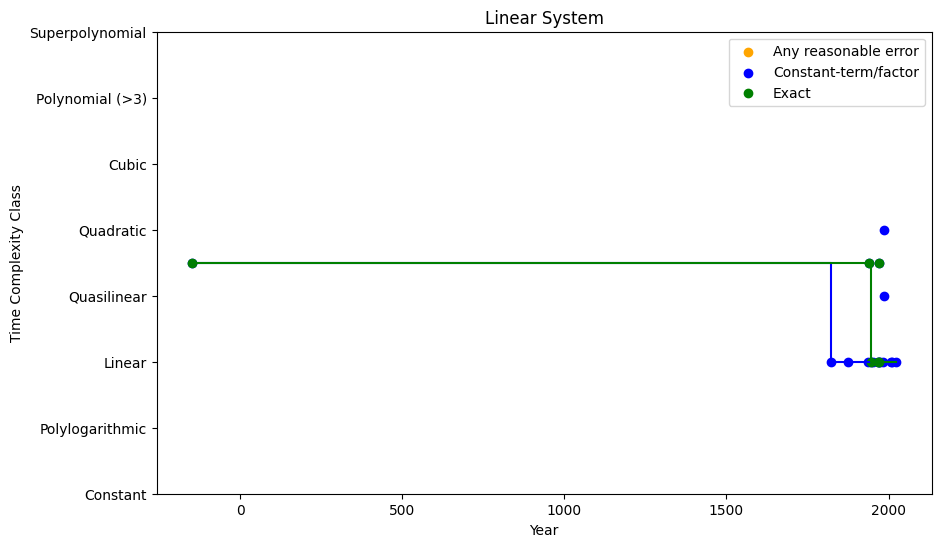

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


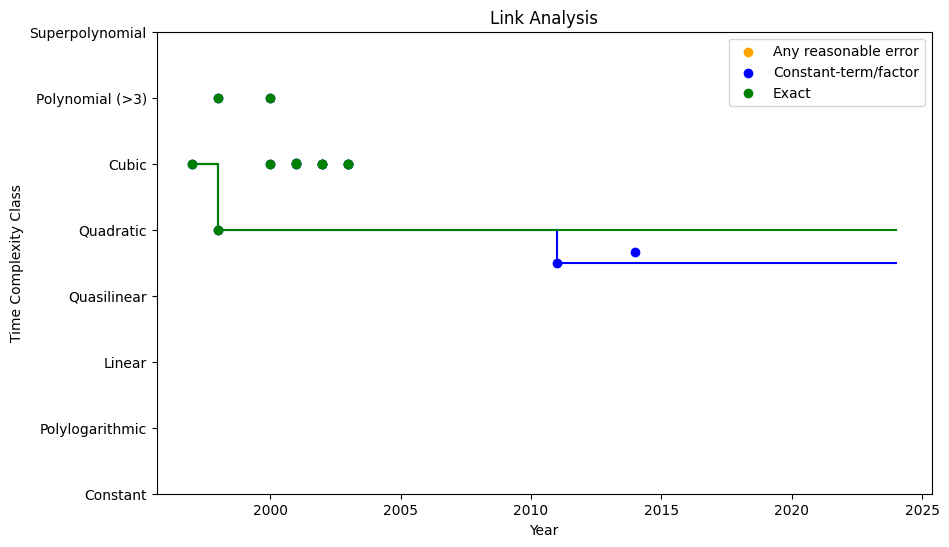

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


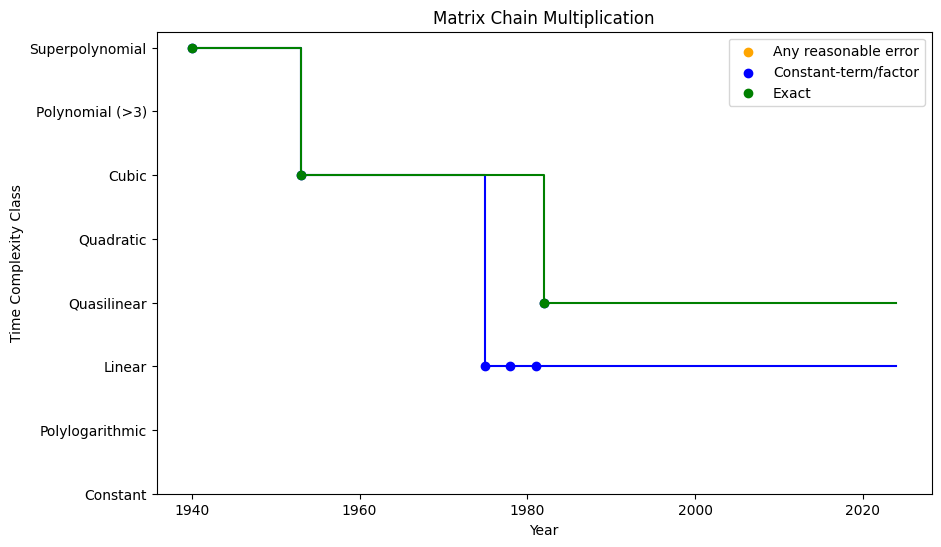

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


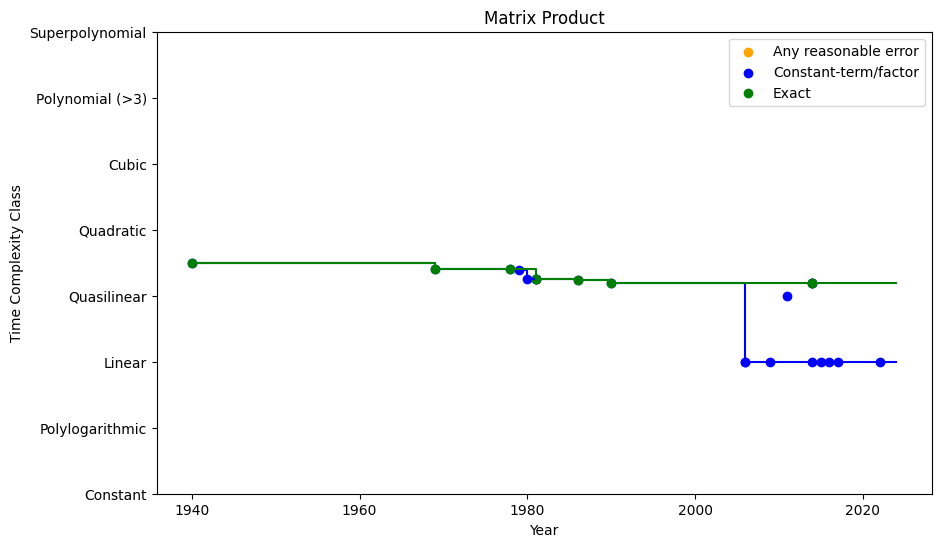

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


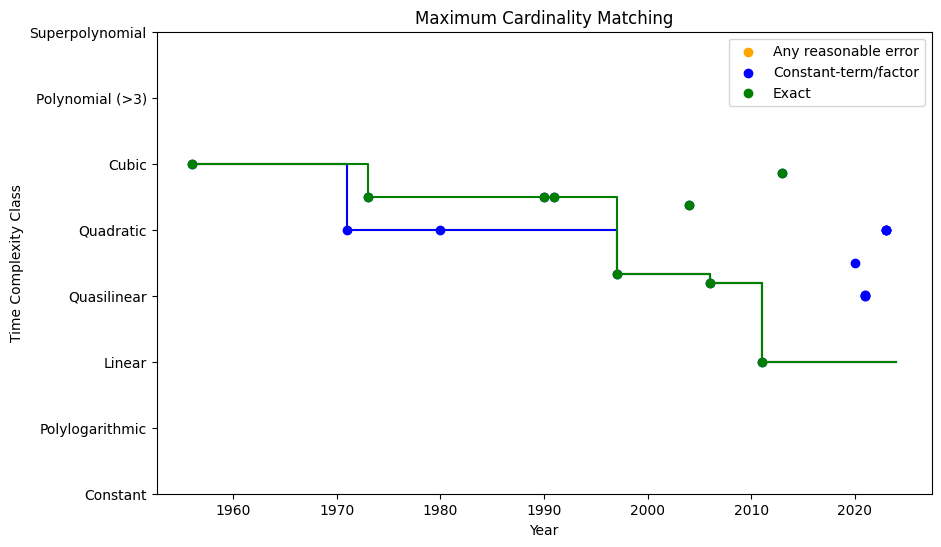

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


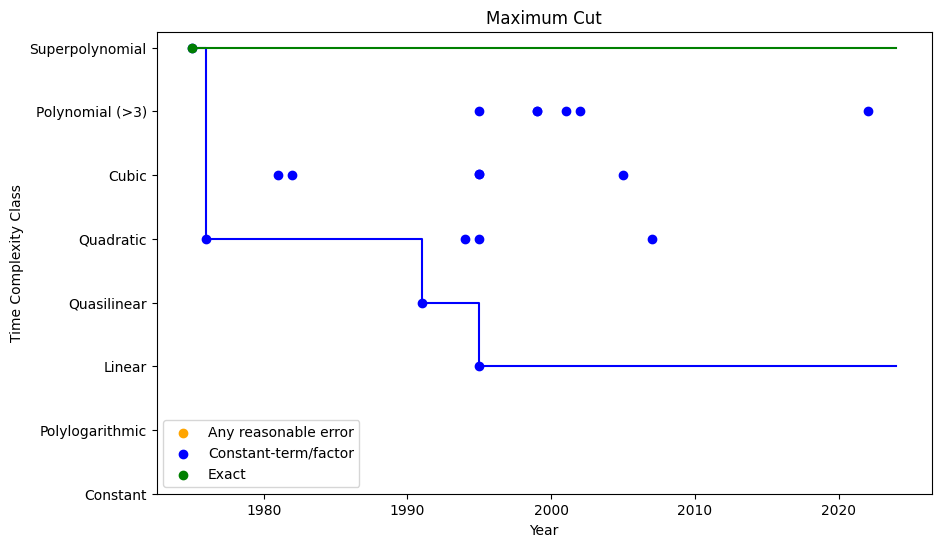

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


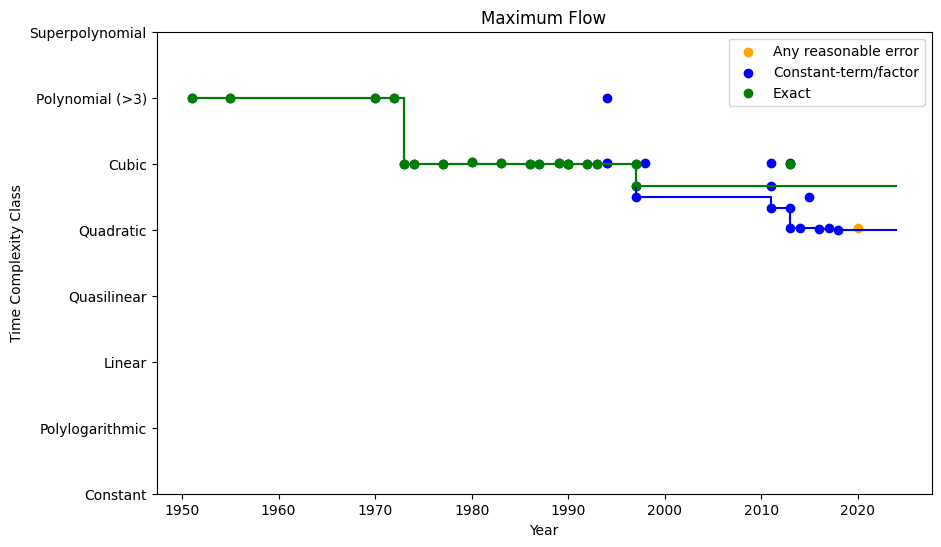

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


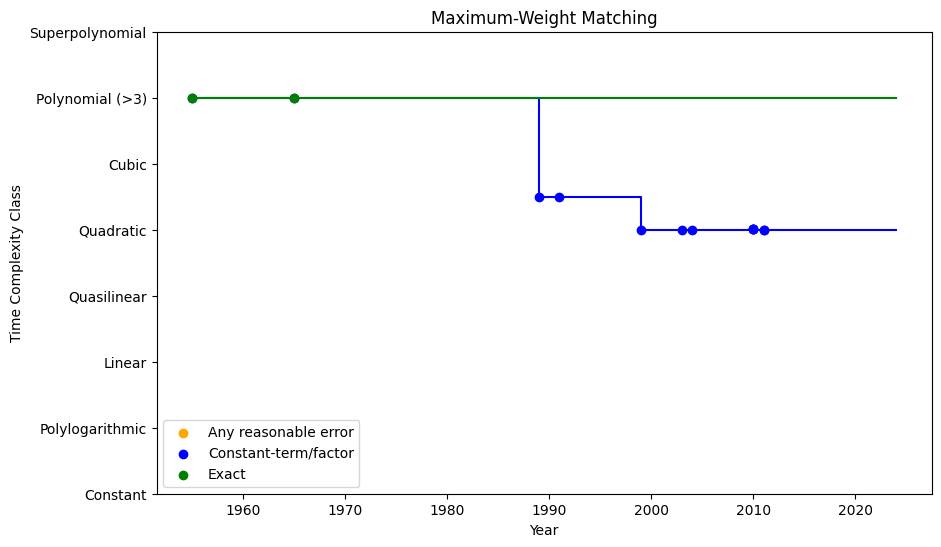

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


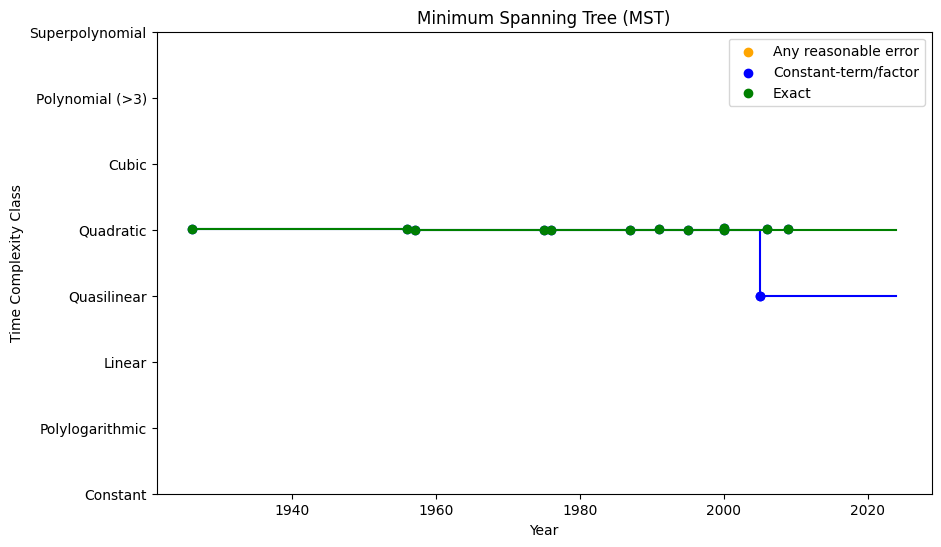

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


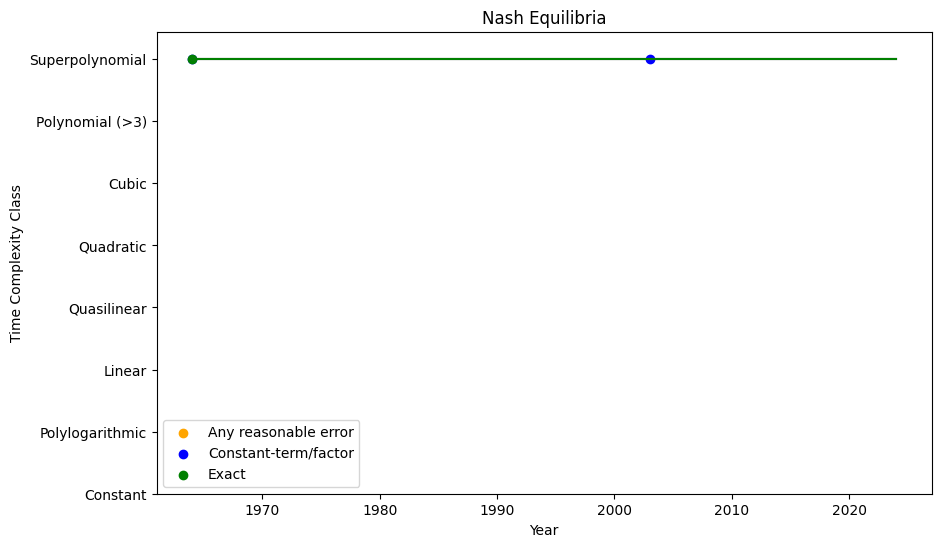

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


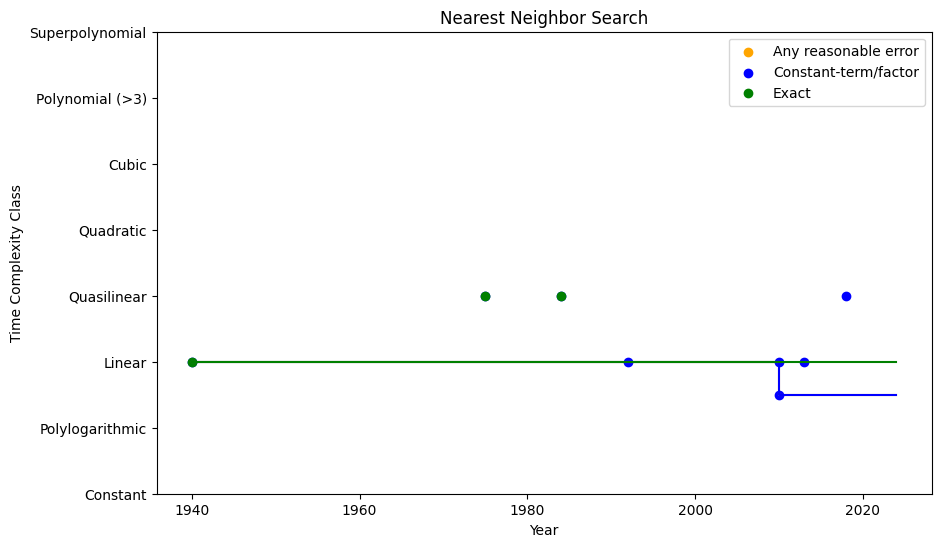

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


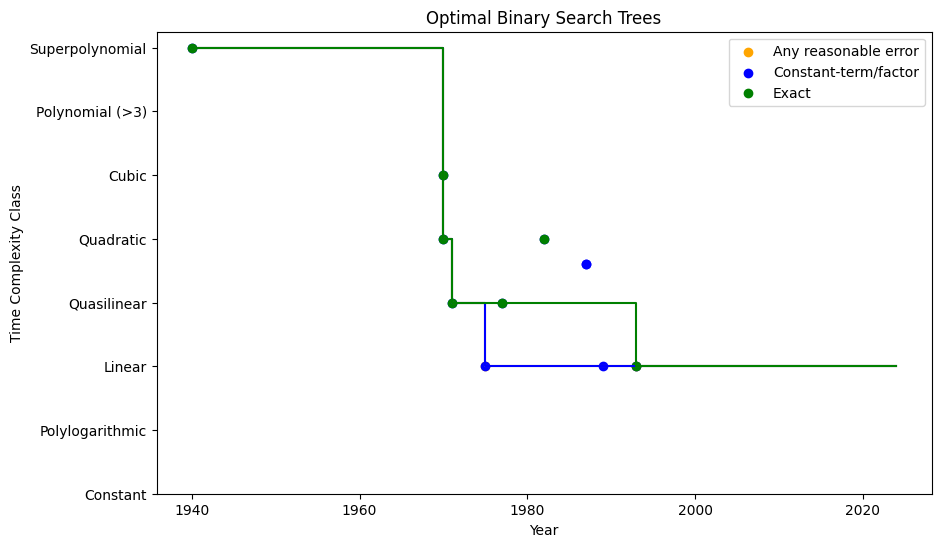

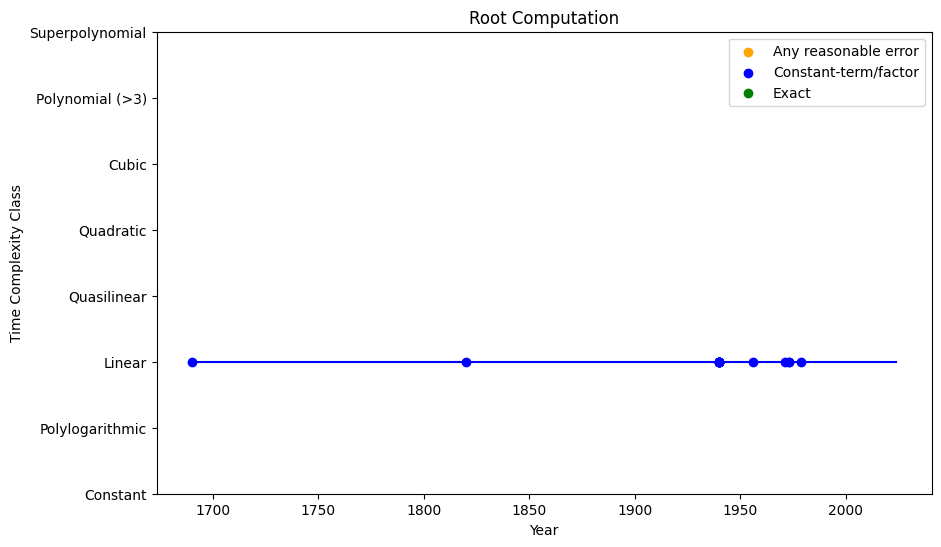

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


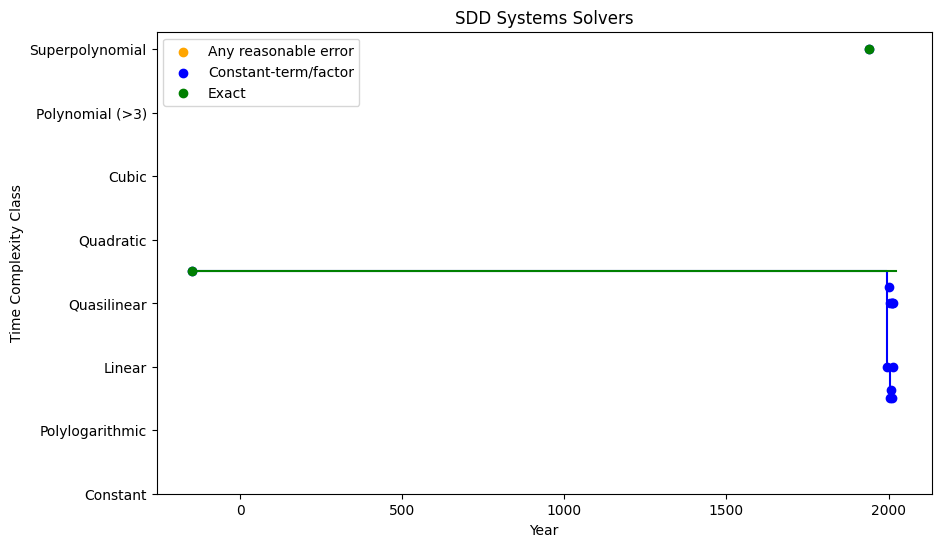

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


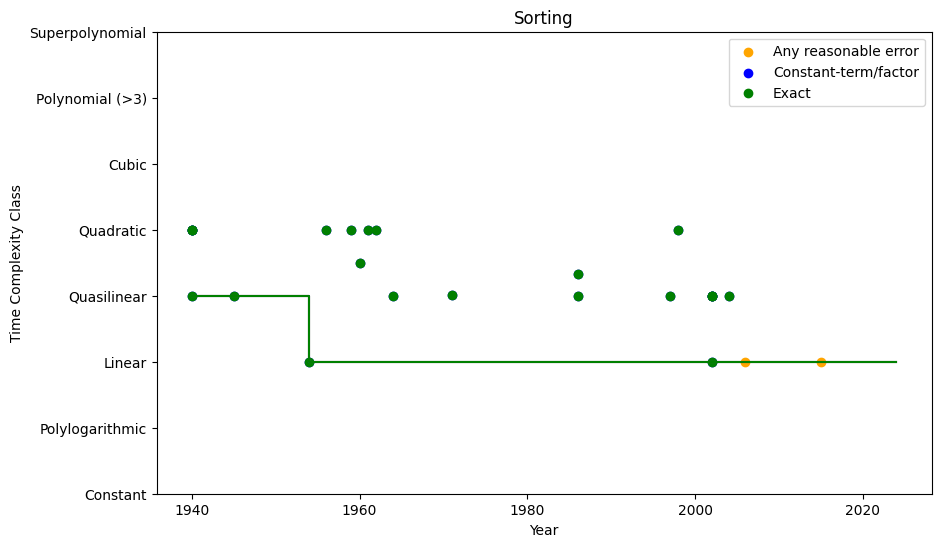

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


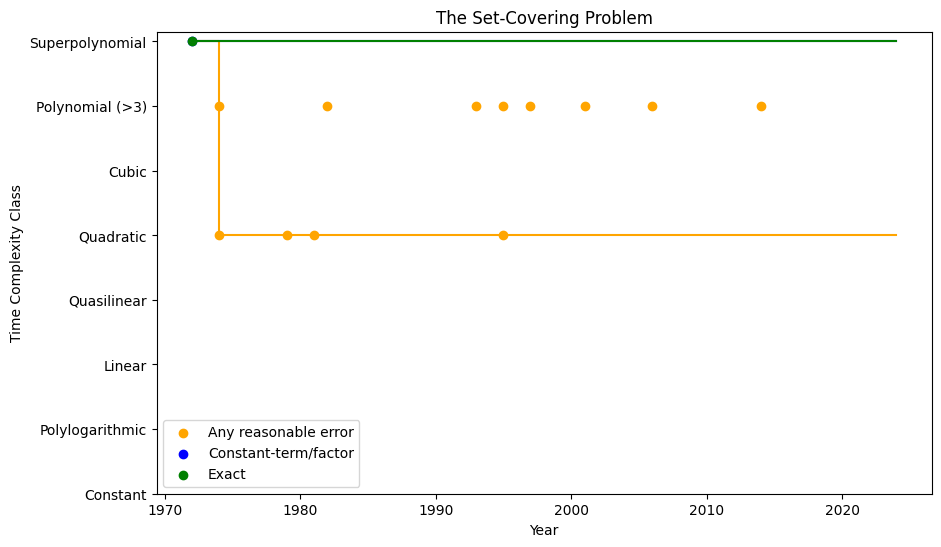

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


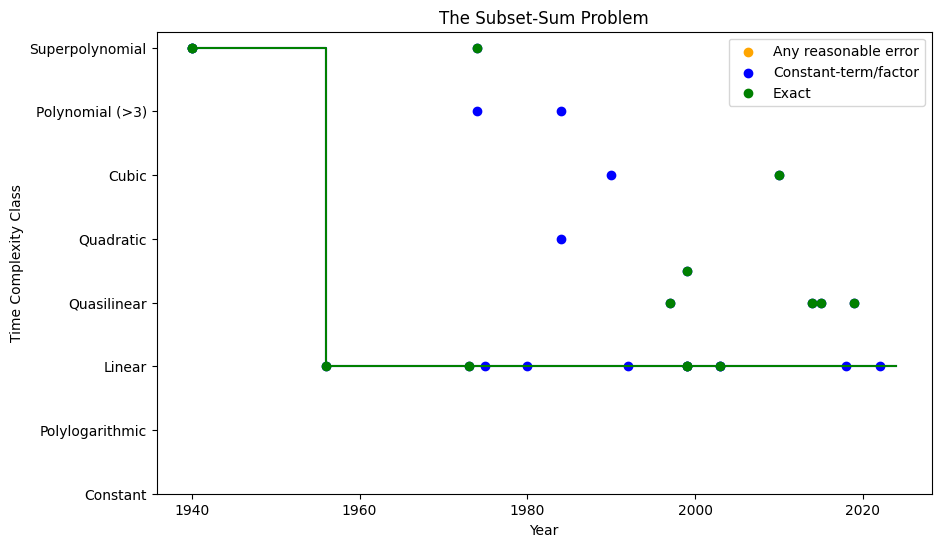

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


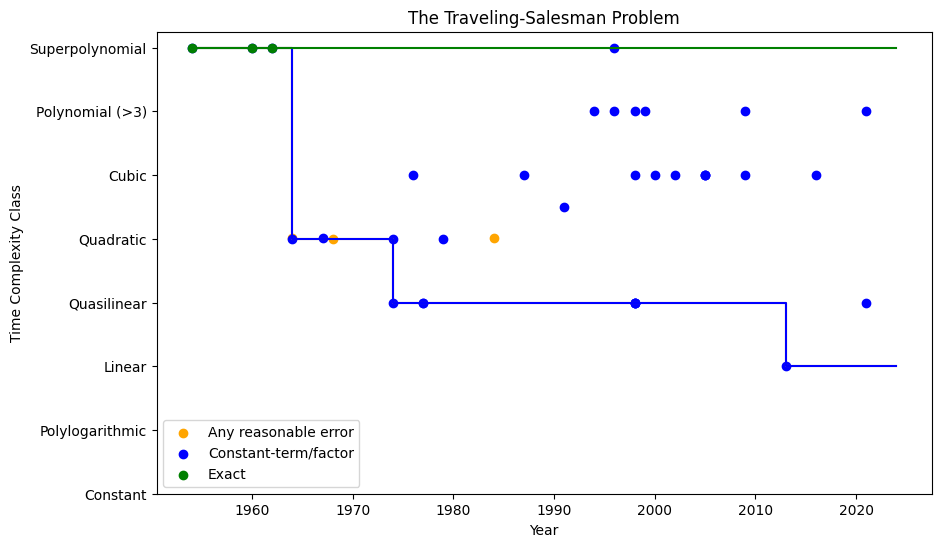

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_5041/3944509059.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


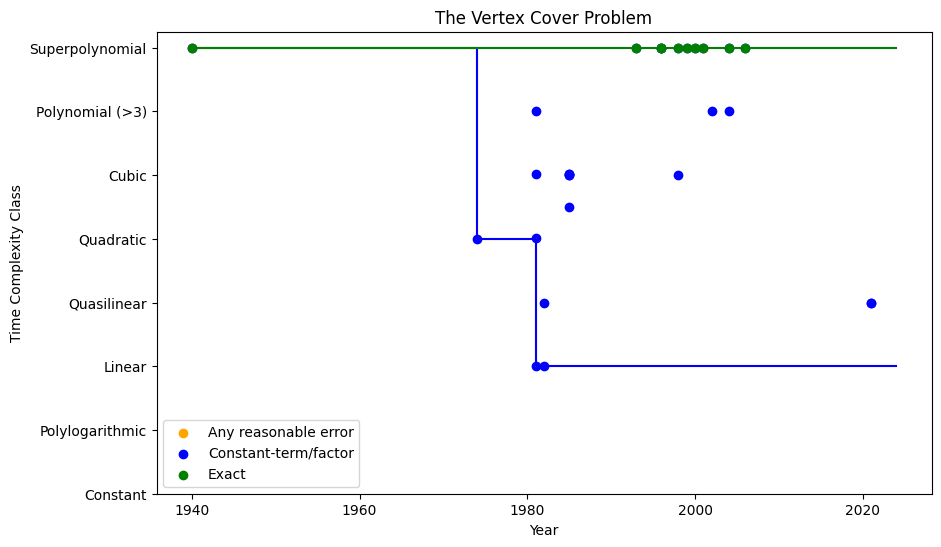

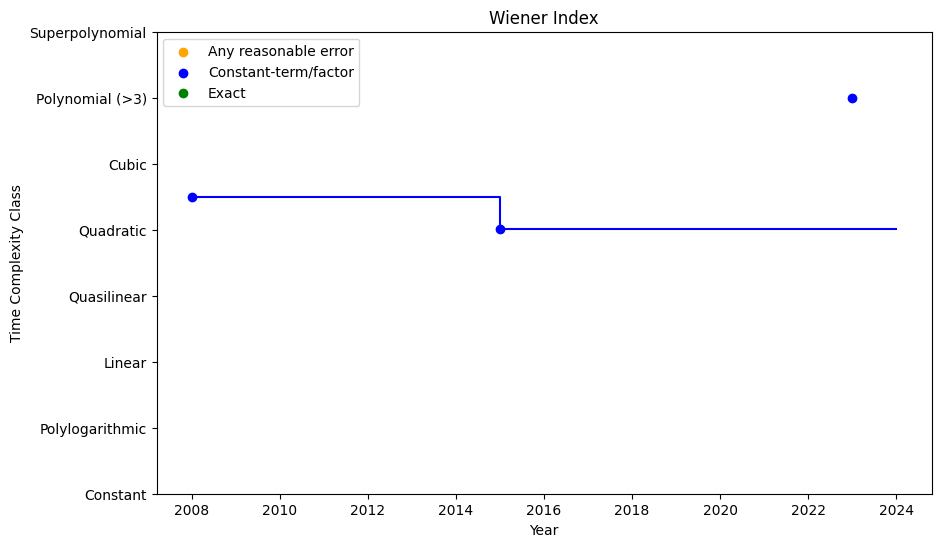

In [5]:
for family in approximation_algorithms['Family Name'].unique():
    plot_family(family)


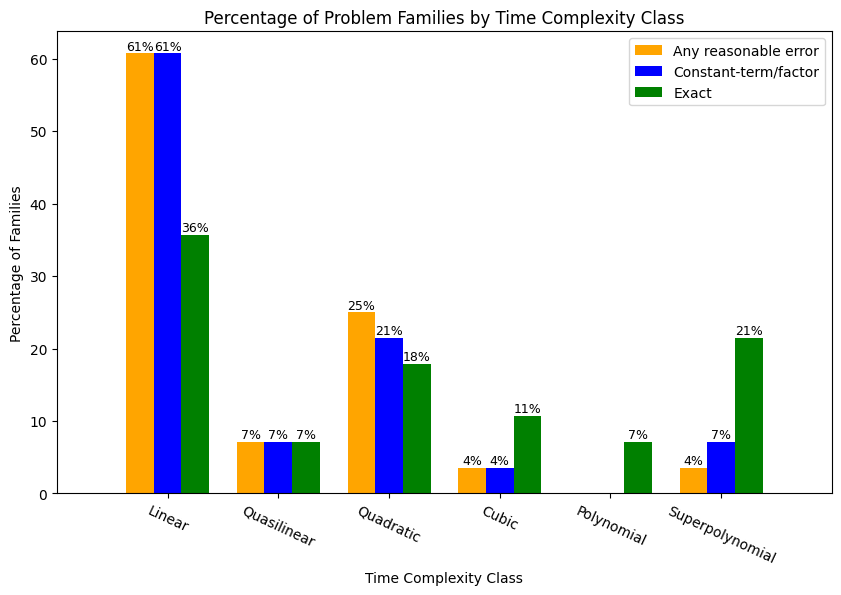

In [29]:
import math
df = pd.concat([approximation_algorithms, sheet1], axis=0)


# print paralel values

# create column exact that is True if the algorithm have no Approximation Type
df['Exact'] = df['Approximation Type (additive/multiplicative)'].isnull()

# create a column Constant Factor that is True if the algorithm have Approximation Factor Class (Mult) <= 2 or Approximation Factor Class (Add) <= 4.5 or is exact
df['Constant Factor'] = (df['Approximation Factor Class (Mult)'].astype(float) <= 4.5) | (df['Approximation Factor Class (Add)'].astype(float) <= 2) | df['Exact']
# sort by year and time complexity
df.sort_values(by=['Year', 'Time Complexity Class'], inplace=True)



# split the data in exact, constant factor and approximate
exact = df[df['Exact'] == True]
constant_factor = df[df['Constant Factor'] | df['Exact']]
# approximate = constant factor = False
approximate = df


# min time complexity class for each family
min_exact = exact.groupby('Family Name')['Time Complexity Class'].min()
min_constant_factor = constant_factor.groupby('Family Name')['Time Complexity Class'].min()
min_approximate = approximate.groupby('Family Name')['Time Complexity Class'].min()

# round number
min_exact = min_exact.dropna().map(lambda x:  math.ceil(x))
min_constant_factor = min_constant_factor.dropna().map(lambda x:  math.ceil(x))
min_approximate = min_approximate.dropna().map(lambda x:  math.ceil(x))

# count how many families have each time complexity class
count_exact = min_exact.value_counts()
count_constant_factor = min_constant_factor.value_counts()
count_approximate = min_approximate.value_counts()





# fill missing time complexity classes with 0
for i in range(1, 9):
    if i not in count_exact:
        count_exact[i] = 0
    if i not in count_constant_factor:
        count_constant_factor[i] = 0
    if i not in count_approximate:
        count_approximate[i] = 0

# sort by index
count_exact = count_exact.sort_index()

#root computation
count_exact[3] = count_exact[3] + 1
#convex optimization
count_exact[7] = count_exact[7] + 1
#wiener
count_exact[8] = count_exact[8] + 1


count_constant_factor = count_constant_factor.sort_index()
count_approximate = count_approximate.sort_index()

# number of unique families in the df
n_families = df['Family Name'].nunique()


# plot as percentage
plt.figure(figsize=(10, 6))
# plot grouped bars
plt.bar(np.arange(1, 9, 1) - 0.25, count_approximate.values / n_families * 100, width=0.25, label='Any reasonable error', color='orange')
plt.bar(np.arange(1, 9, 1), count_constant_factor.values / n_families * 100, width=0.25, label='Constant-term/factor' , color='blue' )
plt.bar(np.arange(1, 9, 1) + 0.25, count_exact.values / n_families * 100, width=0.25, label='Exact', color='green')


plt.xticks(np.arange(3, 9, 1), [ 'Linear', 'Quasilinear', 'Quadratic', 'Cubic', 'Polynomial', 'Superpolynomial'])

# increase space between bars

plt.xlabel('Time Complexity Class')
plt.ylabel('Percentage of Families')

# Set the limits to fit the plot as the original
plt.xlim(2, 9)



# Add the percentage on top of each bar and fix the labels

for bar in plt.gca().patches:
    yval = bar.get_height()
    if yval > 0:
        
        plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.5, f'{yval:.0f}%', ha='center', fontsize=9)


plt.legend()

# rotate x labels
plt.xticks(rotation=-25)

plt.title('Percentage of Problem Families by Time Complexity Class')

plt.show()
